In [1]:
import keras
import sys
import sys
sys.path.insert(0, '../models')

from  multiclass_MLP_v1_0 import create_mnist_train_test

2022-11-04 21:10:28.601521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

X_train,  X_valid, X_test, y_train, y_valid, y_test = create_mnist_train_test()
model = keras.models.load_model("../multiclass_MLP_v1_alternate") # rollback to best model

print(model.evaluate(X_test, y_test))

2022-11-04 21:10:38.573005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


313/313 [==============================] - 1s 1ms/step - loss: 0.0804 - accuracy: 0.9853
[0.08041948825120926, 0.9853000044822693]


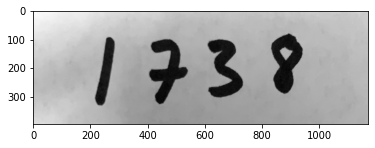

In [34]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


image = cv2.imread('./small_1738.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

plt.imshow(grey, cmap='gray')

In [35]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

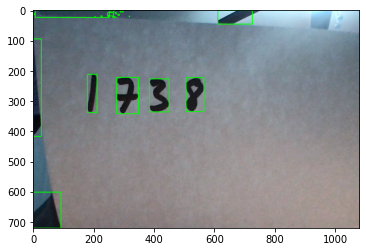

In [55]:

preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
# print("\n\n\n----------------Contoured Image--------------------")
# plt.imshow(image, cmap="gray")
# plt.show()

plt.imshow(image)
    
# inp = np.array(preprocessed_digits)

1/1 [==============================] - 1s 762ms/step
PREDICTED NUMBER:  3


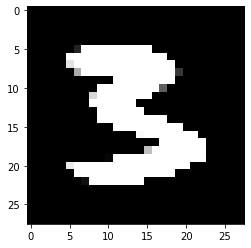

In [37]:
prediction = np.argmax(model.predict(preprocessed_digits[0].reshape(1, 28, 28, 1)) )
print("PREDICTED NUMBER: ", prediction) 
plt.imshow(preprocessed_digits[0].reshape(28, 28), cmap="gray")


In [4]:
# for digit in preprocessed_digits:
#     prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
#     print ("\n\n---------------------------------------\n\n")
#     print ("=========PREDICTION============ \n\n")
#     plt.imshow(digit.reshape(28, 28), cmap="gray")
#     plt.show()
#     print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
#     print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
#     hard_maxed_prediction = np.zeros(prediction.shape)
#     hard_maxed_prediction[0][np.argmax(prediction)] = 1
#     print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
#     print ("\n\n---------------------------------------\n\n")

## Analysis of Example Images

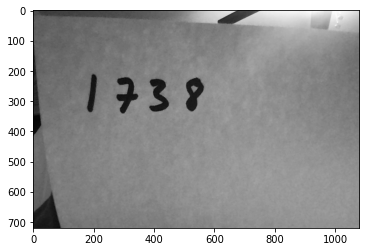

In [56]:
image = cv2.imread('./ex_webcam.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

plt.imshow(grey, cmap='gray')

preprocessed_digits = []
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [71]:
# plt.imshow(contours[0], cmap="gray")

x,y,w,h = cv2.boundingRect(contours[4])

# Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

# Cropping out the digit from the image corresponding to the current contours in the for loop
digit = thresh[y:y+h, x:x+w]

# Resizing that digit to (18, 18)
resized_digit = cv2.resize(digit, (18,18))


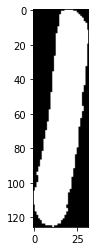

In [72]:
plt.imshow(digit, cmap='gray')


1/1 [==============================] - 0s 25ms/step
PREDICTED NUMBER:  0


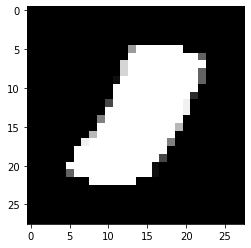

In [73]:
padded_digit= np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

prediction = np.argmax(model.predict(padded_digit))
print("PREDICTED NUMBER: ", prediction) 
# plt.imshow(resized_digit.reshape(28, 28), cmap="gray")
plt.imshow(padded_digit, cmap='gray')


## Trying to resize mnist dataset to larger images

(60000, 28, 28)


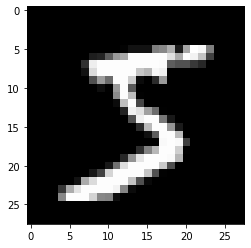

In [79]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

print(x_train.shape) # (60000, 28, 28)

plt.imshow(x_train[0], cmap='gray')



(60000, 45, 45, 1)


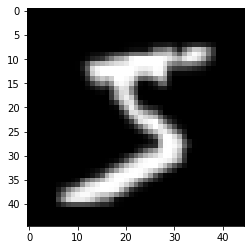

In [80]:
# after adjustments

# train set / data 
x_train = np.expand_dims(x_train, axis=-1)
x_train = tf.image.resize(x_train, [45,45]) # if we want to resize 

print(x_train.shape) # (60000, 32, 32, 1)
plt.imshow(x_train[0], cmap='gray')